In [2]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error


In [3]:
def plotDoseResponse2(inducer,doseResponseRed, doseResponseGreen,semRed, semGreen, pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer,doseResponseRed,label='RFP', c='red')
    ax.errorbar(inducer,doseResponseRed,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseGreen,label='GFP', c='green')
    ax2.errorbar(inducer,doseResponseGreen,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    plt.show()
def plotDoseResponsevsData(inducer,inducer_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, doseResponseRed,doseResponseGreen,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')


    plt.show()

def plotDoseResponse(inducer_list, U_ss, color='k'):
    plt.plot(inducer_list,U_ss, c=color)
    plt.xlabel('[inducer]')
    plt.ylabel('Fluorescence')
    plt.xscale('log')
    plt.show()

def doseResponse(subcircuit, inducer_list, initial_conditions=[10,10]):
    U_ss = []
    T=1000
    t = np.linspace(0, T, T*50)
    for inducer in inducer_list:
        sol = odeint(subcircuit.ddt, initial_conditions, t, args=(inducer,inducer))
        Ustar_ODE=sol[-1]
        U_ss.append(sol[-1])
    return np.array(U_ss)

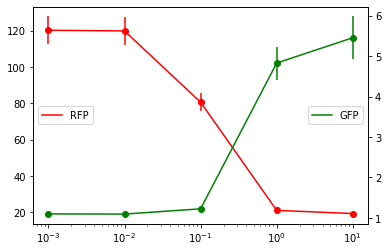

array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [4]:
doseResponseExp = pkl.load(open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl','rb'))
AHL_list = doseResponseExp['AHL_list']; gfpExp_list = doseResponseExp['maxATC_doseResponse_gfp']; rfpExp_list = doseResponseExp['maxATC_doseResponse_rfp']
semRed = doseResponseExp['maxATC_doseResponse_rfp_sem']; semGreen = doseResponseExp['maxATC_doseResponse_gfp_sem']


plotDoseResponse2(AHL_list, rfpExp_list, gfpExp_list, semRed, semGreen)
AHL_list

Step 1: load parameter distributions (prior)


In [5]:

# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='0nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 10000

print(f'Circuit:{circuit_n}, Variant:{variant}')

df_full= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_balanced.pkl"%(circuit_n,variant,n_param_sets), "rb"))
df = df_full[['VE','VF','muLVA','Kbd','Kfe','Kee','nbd','nfe','nee','Kee']]
df_balanced = df_full[df_full['balance'] == 'Balanced']
df_balanced = df_balanced[['VE','VF','muLVA','Kbd','Kfe','Kee','nbd','nfe','nee','Kee']]

df_balanced

Circuit:circuit14, Variant:0nd


,VE,VF,muLVA,Kbd,Kfe,Kee,nbd,nfe,nee,Kee
39,135.071601,70.740091,4.234870,282.019659,29.688299,2.759599,2.0,4.0,4.0,2.759599
55,374.823369,12.668799,4.567963,24.354543,1.140196,13.466556,2.0,4.0,4.0,13.466556
110,497.823241,422.268051,3.210618,10.342381,2.402371,16.299446,2.0,4.0,4.0,16.299446
163,587.913234,137.350124,3.642415,18.163844,4.073152,179.649466,2.0,4.0,4.0,179.649466
219,320.867342,141.142323,3.507428,111.395903,32.306640,17.530428,2.0,4.0,4.0,17.530428
...,...,...,...,...,...,...,...,...,...,...
9371,46.363624,93.468191,3.244729,41.570913,4.275614,1.773486,2.0,4.0,4.0,1.773486
9382,142.424269,12.597716,3.867815,3.429163,3.049159,4.202704,2.0,4.0,4.0,4.202704
9629,204.303488,33.611418,3.400673,24.770703,21.003452,68.192586,2.0,4.0,4.0,68.192586
9658,263.489174,333.420829,3.451172,5.526032,134.094081,4.011761,2.0,4.0,4.0,4.011761


In [6]:
subcircuit = lambda x: subcircuit1_circuit14(x)

# par_dict['VE'] = pars[0]

Step 2: Sample from prior


initial
pardict1 {'VE': 119.72143284611407, 'VF': 4.527080750371472, 'muLVA': 3.503375965926921, 'Kbd': 0.4661989090307794, 'Kfe': 3.441357464274913, 'Kee': 0.09999999708037076, 'nbd': 1.7024856417737533, 'nfe': 3.798016814688695, 'nee': 4.000000000577716}


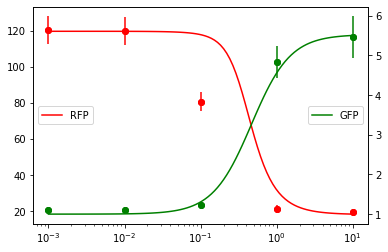

The maximum number of function evaluations is exceeded.
Function evaluations 100, initial cost 2.4919e+09, final cost 7.8482e+05, first-order optimality 1.00e+07.
final
pardict_final {'VE': 119.76207777030659, 'VF': 4.527366973484433, 'muLVA': 3.5033759643560813, 'Kbd': 0.1332581611749327, 'Kfe': 3.3050693126868755, 'Kee': 0.10000000063868318, 'nbd': 1.611445073705572, 'nfe': 3.7916010317166737, 'nee': 3.9999999988000687}


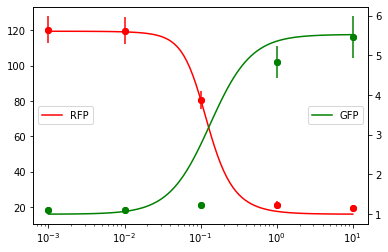

In [39]:
from scipy.optimize import least_squares
def residualDoseResponse(pars):
    par_dict2_data = df_balanced.iloc[0].to_dict()
    par_dict1 = {}
    for count,key in enumerate(par_dict2_data.keys()):
        par_dict1[key] = pars[count]

    U_ss1= doseResponse(subcircuit(par_dict1), AHL_list)
    data = np.array([rfpExp_list, gfpExp_list]).T
    sem = np.array([semRed, semGreen])

    # print([(np.square(U_ss1 - data)[:,x]/sem) for x in range(2)])
    # print(sem)
    relError = [np.sum(np.square(U_ss1 - data)[:,x]/sem) for x in range(2)]
    # relError = np.sum(np.square(U_ss1 - data)[ :,0]/sem)
    # error = [np.sum(np.square(U_ss1 - data)[:,x]) for x in range(2)]
    # print(error)
    # relError = np.divide(error,np.amax(data, keepdims=True, axis=0)[0])
    # print(relError)
    # print('-----------------')
    # return error
    return relError

# residualDoseResponse(pars)


# print('target')
# plotDoseResponse2(AHL_list,gfpExp_list, rfpExp_list )
A_list = np.logspace(-3,1, 100)

print('initial')
par_dict = df_balanced.iloc[7].to_dict()
par_dict['Kfe'] = 5
par_dict['Kbd'] =0.5
par_dict['VF'] = 3.5
par_dict['nbd'] = 2
par_dict['VE'] = 120
par_dict['Kee'] = 0.1

# par_dict['Kfe'] = 3.441357464274913
# par_dict['Kbd'] =0.1497382604896311
# par_dict['VF'] = 5.940100490421818
# par_dict['nbd'] = 1.9307152161207934
# par_dict['nfe'] = 3.79
# par_dict['VE'] = 119.72143284611407
# par_dict['Kee'] = 0.1
par_dict= {'VE': 119.72143284611407, 'VF': 4.527080750371472, 'muLVA': 3.503375965926921, 'Kbd': 0.4661989090307794, 'Kfe': 3.441357464274913, 'Kee': 0.09999999708037076, 'nbd': 1.7024856417737533, 'nfe': 3.798016814688695, 'nee': 4.000000000577716}
print('pardict1', par_dict)
U_ss= doseResponse(subcircuit(par_dict), A_list)
plotDoseResponsevsData(AHL_list,A_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )
# plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


pars = [x for x in par_dict.values()]
r = least_squares(residualDoseResponse,pars, max_nfev=100 , verbose=1)
x = r['x']
new_par_dict = {}
for count,key in enumerate(par_dict.keys()):
    new_par_dict[key] = x[count]

print('final')
print('pardict_final', new_par_dict)
U_ss= doseResponse(subcircuit(new_par_dict), A_list)
plotDoseResponsevsData(AHL_list,A_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )
# plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


In [38]:
r

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
        cost: 446458.53680580267
         fun: array([944.94289437])
        grad: array([-2.32484132e+06,  1.61126998e+05, -8.23130861e-03,  9.20020288e+06,
       -3.42310821e+06,  1.44186843e-02, -9.04687688e+05, -3.24554136e+06,
       -5.91166061e-01])
         jac: array([[-2.46029822e+03,  1.70515064e+02, -8.71090588e-06,
         9.73625278e+03, -3.62255564e+03,  1.52587891e-05,
        -9.57399324e+02, -3.43464286e+03, -6.25610356e-04]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 100
        njev: 90
  optimality: 9200202.87946539
      status: 0
     success: False
           x: array([1.19730398e+02, 4.54395814e+00, 3.50337596e+00, 1.28071352e-01,
       3.39949490e+00, 9.99999971e-02, 1.61362679e+00, 3.77323270e+00,
       4.00000000e+00])

In [ ]:
import pandas as pd
r_df = pd.read_csv('r.csv')
plt.plot(r_df['Iteration'],r_df['Cost'] , c = 'darkslategrey', label='Cost')
plt.plot(r_df['Iteration'],r_df['Cost Reduction'],  c = 'lightseagreen',label='Cost Reduction')
plt.yscale('log')
plt.legend()
